In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('fivethirtyeight')
import folium 

In [2]:
CPS_df = pd.read_csv("../data/processed/CPS_2009_2017_clean.csv")
ACS_df = pd.read_csv("../data/processed/ACS_2011_2017_clean.csv")
#NFCS_df = pd.read_csv("../data/processed/NFCS_2009_2018_clean.csv")

#### CPS Missingness
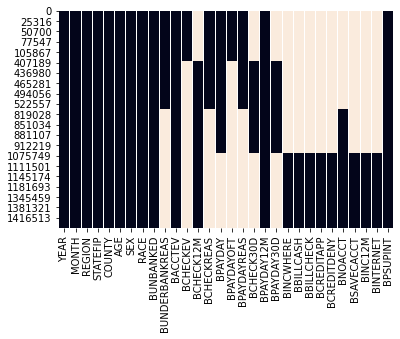

ACS Missingness Data 
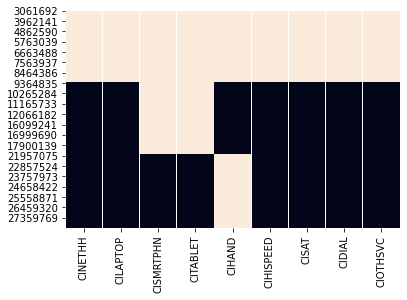

In [9]:
frames = [CPS_df, ACS_df]
#[CPS_df, ACS_df, NFCS_df]

In [10]:
for frame in frames:
    display(frame.YEAR.unique())

array([2011, 2013, 2015, 2017], dtype=int64)

array([2011, 2012, 2013, 2015, 2017, 2018], dtype=int64)

In [11]:
[[frame["YEAR"].unique()] for frame in frames]

[[array([2011, 2013, 2015, 2017], dtype=int64)],
 [array([2011, 2012, 2013, 2015, 2017, 2018], dtype=int64)]]

In [12]:
STATES = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
          "Connecticut","Delaware","District of Columbia", "Florida","Georgia","Hawaii",
          "Idaho","Illinois", "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine",
          "Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
          "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
          "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
          "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
          "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

In [13]:
STATE_FIPS = list(frames[0].STATEFIP.unique())

In [14]:
STATE = {}
for state, name in zip(STATE_FIPS, STATES):
    STATE[state] = name

In [15]:
CPS_df["STATE"] = CPS_df.STATEFIP.map(STATE)

In [16]:
ACS_df["STATE"] = ACS_df.STATEFIP.map(STATE)

In [17]:
CPS_df[["STATEFIP", "COUNTY", "REGION"]]

,STATEFIP,COUNTY,REGION
0,1,0,32
1,1,0,32
2,1,0,32
3,1,0,32
4,1,1097,32
...,...,...,...
356045,56,0,41
356046,56,0,41
356047,56,0,41
356048,56,0,41


In [18]:
ACS_df.head()

,Unnamed: 0,YEAR,SAMPLE,REGION,STATEFIP,COUNTYFIP,HHINCOME,SEX,AGE,MARST,...,CISMRTPHN,CITABLET,CIHAND,CIHISPEED,CISAT,CIDIAL,CIOTHSVC,FAMSIZE,HHWT,STATE
0,3061692,2011,201101,32,1,125,9999999,2,19,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,63.0,Alabama
1,3061693,2011,201101,32,1,0,9999999,2,86,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16.0,Alabama
2,3061694,2011,201101,32,1,0,87200,1,78,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,30.0,Alabama
3,3061695,2011,201101,32,1,0,87200,2,74,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,30.0,Alabama
4,3061696,2011,201101,32,1,0,43200,1,57,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,31.0,Alabama


In [19]:
ACS_df.STATEFIP

0            1
1            1
2            1
3            1
4            1
            ..
18909421    56
18909422    56
18909423    56
18909424    56
18909425    56
Name: STATEFIP, Length: 18909426, dtype: int64

In [20]:
ACS_df.COUNTYFIP.unique()

array([125,   0,  97,  73, 117,   3,  81,  15,  55,  20,  27,  13,   5,
        19,  25, 119, 143,   7,  37,  65, 113,  87,  67,  71,  59,  29,
       111, 107,  85,   1,  99,  75,  95,  79,  83,  23,  47,  61,  77,
        89,  31,  17,  41,  39, 123,  11,   9, 109, 105, 127, 101,  21,
       103,  57,  69,  91, 115,  33,  53, 121, 215, 151,  51,  63, 139,
       135, 245, 179,  43, 141,  35, 163, 153, 193, 209, 177, 510, 145,
       161,  93, 137, 189, 183,  45, 159, 191, 133, 147, 155,  49, 169,
       165, 129, 157, 187, 149, 201, 491, 303, 167, 309, 441, 381, 423,
       329, 375, 479, 485, 251, 710, 760, 810, 650, 550, 700, 185, 223,
       313, 197, 227, 171, 453, 439, 355, 339, 367, 257, 451], dtype=int64)

### What is the prevalence of un(der)banked persons in the U.S.?

In [21]:
underbanked = pd.DataFrame()
underbanked["STATE"] = CPS_df.STATE
underbanked["YEAR"] = CPS_df.YEAR
underbanked["UNBANKED"] = CPS_df.BUNBANKED
underbanked = underbanked.groupby(["STATE", "YEAR"]).count()

In [22]:
underbanked = underbanked.reset_index()

In [23]:
underbanked["PROP_SURVEY_POP"] = np.log(underbanked.UNBANKED/underbanked.UNBANKED.sum()*100)

underbanked

,STATE,YEAR,UNBANKED,PROP_SURVEY_POP
0,Alabama,2011,1010,-1.259951
1,Alabama,2013,923,-1.350027
2,Alabama,2015,1415,-0.922771
3,Alabama,2017,1435,-0.908736
4,Alaska,2011,1377,-0.949994
...,...,...,...,...
199,Wisconsin,2017,1374,-0.952175
200,Wyoming,2011,1398,-0.934858
201,Wyoming,2013,1210,-1.079281
202,Wyoming,2015,1165,-1.117180


####

* each state
    *percentage of people unbanked vs whole population (need full unbanked variable)

In [24]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

m = folium.Map(location=[50, -100], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='Unbanked Distribution',
    data=underbanked,
    columns=['STATE', "PROP_SURVEY_POP"],
    key_on='feature.properties.name',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name= 'UNBANKED (Percentage of State Sample Population)').add_to(m)

display(m)

In [25]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

for x, year in enumerate(underbanked.YEAR.unique(),1):
    holder = underbanked[underbanked.YEAR == year]
    
    m = folium.Map(location=[50, -100], zoom_start=3)

    folium.Choropleth(
        geo_data=state_geo,
        name='Unbanked Distribution',
        data=underbanked,
        columns=['STATE', "PROP_SURVEY_POP"],
        key_on='feature.properties.name',
        fill_color='RdPu',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name= 'UNBANKED (Percentage of State Sample Population)').add_to(m)
    display(year)
    display(m)
    

2011

2013

2015

2017

### What proportions of un(der)banked populations have internet access?

In [20]:
ub_internet = pd.DataFrame()
ub_internet["STATE"] = CPS_df.STATE
ub_internet["INTERNET"] = ACS_df.CINETHH

ub_internet = underbanked.groupby(["STATE"]).count()

In [21]:
ub_internet.head()

,YEAR,UNBANKED,PROP_SURVEY_POP
STATE,,,
Alabama,4,4,4
Alaska,4,4,4
Arizona,4,4,4
Arkansas,4,4,4
California,4,4,4


#### How does this change over time?

In [54]:
ACS_df.columns

Index(['Unnamed: 0', 'YEAR', 'SAMPLE', 'REGION', 'STATEFIP', 'COUNTYFIP',
       'HHINCOME', 'SEX', 'AGE', 'MARST', 'RACE', 'CITIZEN', 'EDUC', 'OCC2010',
       'CINETHH', 'CILAPTOP', 'CISMRTPHN', 'CITABLET', 'CIHAND', 'CIHISPEED',
       'CISAT', 'CIDIAL', 'CIOTHSVC', 'FAMSIZE', 'HHWT', 'STATE'],
      dtype='object')

In [65]:
ACS_df[~ACS_df.CINETHH.isnull()].groupby(["STATE", "COUNTYFIP"]).count()

Unnamed: 0    YEAR  SAMPLE  REGION  STATEFIP  HHINCOME  \
STATE     COUNTYFIP                                                           
Alabama   0              128104  128104  128104  128104    128104    128104   
          3                5785    5785    5785    5785      5785      5785   
          15               4066    4066    4066    4066      4066      4066   
          55               4008    4008    4008    4008      4008      4008   
          73              22380   22380   22380   22380     22380     22380   
...                         ...     ...     ...     ...       ...       ...   
Wisconsin 117              4554    4554    4554    4554      4554      4554   
          127              3844    3844    3844    3844      3844      3844   
          133             11360   11360   11360   11360     11360     11360   
          139              5343    5343    5343    5343      5343      5343   
Wyoming   0               23299   23299   23299   23299     23299     23299   

                        SEX     AGE   MARST    RACE  ...  CILAPTOP  CISMRTPHN  \
STATE     COUNTYFIP                                  ...                        
Alabama   0          128104  128104  128104  128104  ...    128104      63981   
          3            5785    5785    5785    5785  ...      5785       3089   
          15           4066    4066    4066    4066  ...      4066       2074   
          55           4008    4008    4008    4008  ...      4008       1953   
          73          22380   22380   22380   22380  ...     22380      11108   
...                     ...     ...     ...     ...  ...       ...        ...   
Wisconsin 117          4554    4554    4554    4554  ...      4554       2286   
          127          3844    3844    3844    3844  ...      3844       1919   
          133         11360   11360   11360   11360  ...     11360       5763   
          139          5343    5343    5343    5343  ...      5343       2659   
Wyoming   0           23299   23299   23299   23299  ...     23299      11652   

                     CITABLET  CIHAND  CIHISPEED   CISAT  CIDIAL  CIOTHSVC  \
STATE     COUNTYFIP                                                          
Alabama   0             63981   64123     128104  128104  128104    128104   
          3              3089    2696       5785    5785    5785      5785   
          15             2074    1992       4066    4066    4066      4066   
          55             1953    2055       4008    4008    4008      4008   
          73            11108   11272      22380   22380   22380     22380   
...                       ...     ...        ...     ...     ...       ...   
Wisconsin 117            2286    2268       4554    4554    4554      4554   
          127            1919    1925       3844    3844    3844      3844   
          133            5763    5597      11360   11360   11360     11360   
          139            2659    2684       5343    5343    5343      5343   
Wyoming   0             11652   11647      23299   23299   23299     23299   

                     FAMSIZE    HHWT  
STATE     COUNTYFIP                   
Alabama   0           128104  128104  
          3             5785    5785  
          15            4066    4066  
          55            4008    4008  
          73           22380   22380  
...                      ...     ...  
Wisconsin 117           4554    4554  
          127           3844    3844  
          133          11360   11360  
          139           5343    5343  
Wyoming   0            23299   23299  

[478 rows x 24 columns]

### What devices do un(der)banked populations have access to?

In [27]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

m = folium.Map(location=[50, -100], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='Unbanked Distribution',
    data=ub_internet,
    columns=['STATE', "UB_PROPORTION"],
    key_on='feature.properties.name',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name= 'UNBANKED (SUM)').add_to(m)

display(m)

KeyError: 'UB_PROPORTION'

#### How does this change over time?

### Feature Importance

In [19]:
CPS_df

,Unnamed: 0,YEAR,MONTH,REGION,STATEFIP,COUNTY,AGE,SEX,RACE,BUNBANKED,...,BBILLCHECK,BCREDITAPP,BCREDITDENY,BNOACCT,BSAVECACCT,BINC12M,BINTERNET,BPSUPINT,CIHHCOMP,STATE
0,403607,2011,6,32,1,0,66,1,100,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Alabama
1,403608,2011,6,32,1,0,64,2,100,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Alabama
2,403609,2011,6,32,1,0,40,1,100,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Alabama
3,403610,2011,6,32,1,0,15,1,100,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Alabama
4,403611,2011,6,32,1,1097,39,1,100,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356045,1451053,2017,6,41,56,0,60,2,100,1.0,...,1.0,2.0,99.0,2.0,96.0,2.0,1.0,1.0,NaN,Wyoming
356046,1451054,2017,6,41,56,0,70,1,100,1.0,...,1.0,2.0,99.0,2.0,1.0,1.0,1.0,1.0,NaN,Wyoming
356047,1451055,2017,6,41,56,0,65,2,100,1.0,...,1.0,2.0,99.0,2.0,1.0,1.0,1.0,1.0,NaN,Wyoming
356048,1451060,2017,6,41,56,0,48,2,100,1.0,...,1.0,2.0,99.0,2.0,2.0,1.0,1.0,1.0,NaN,Wyoming


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
CPS_model = pd.read_csv("../data/interim/CPS_model_df.csv")

In [29]:
CPS_model_subset = CPS_model.loc[:,["YEAR", "MONTH", "REGION", "STATEFIP", "COUNTY", "AGE", "SEX", "RACE", "BUNBANKED", 
                             "BACCTEV", "BCHECKEV", "BCHECK12M", "BCHECKREAS", "BPAYDAY", "BPAYDAYOFT", 
                             "BPAYDAYREAS", "BCHECK30D", "BPAYDAY12M", "BPAYDAY30D", "BINCWHERE", "BBILLCASH", 
                             "BBILLCHECK", "BCREDITAPP", "BCREDITDENY", "BNOACCT", "BSAVECACCT", "BINC12M", "BINTERNET", 
                             "BPSUPINT", "CIHHCOMP", "CINETHH", "CINETHP", "CINTUSE", "CINTOUT", "CINTOTHH", "CINTLIBH", 
                             "CINTSCH", "CINTSCHH", "CINONET", "CIHSNET", "CIPWT", "CISUPPWT", "UBSUPPWT"]]

In [30]:
CPS_model_subset[CPS_model_subset.isnull() == False]

,YEAR,MONTH,REGION,STATEFIP,COUNTY,AGE,SEX,RACE,BUNBANKED,BACCTEV,...,CINTOUT,CINTOTHH,CINTLIBH,CINTSCH,CINTSCHH,CINONET,CIHSNET,CIPWT,CISUPPWT,UBSUPPWT
0,2009,1,32,1,1015,78,2,200,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2870.1104
1,2009,1,32,1,0,71,1,200,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2558.5056
2,2009,1,32,1,0,68,2,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3433.2190
3,2009,1,32,1,0,67,1,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3620.4713
4,2009,1,32,1,0,62,1,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3223.1477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450923,2017,11,41,56,0,31,2,100,NaN,NaN,...,2.0,2.0,NaN,1.0,NaN,NaN,NaN,428.8771,227.9216,NaN
1450924,2017,11,41,56,0,0,1,100,NaN,NaN,...,99.0,99.0,NaN,99.0,NaN,NaN,NaN,0.0000,313.0697,NaN
1450925,2017,11,41,56,0,7,2,100,NaN,NaN,...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,0.0000,227.8526,NaN
1450926,2017,11,41,56,0,10,1,100,NaN,NaN,...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,0.0000,260.1221,NaN


In [31]:
CPS_model_subset.isnull()

,YEAR,MONTH,REGION,STATEFIP,COUNTY,AGE,SEX,RACE,BUNBANKED,BACCTEV,...,CINTOUT,CINTOTHH,CINTLIBH,CINTSCH,CINTSCHH,CINONET,CIHSNET,CIPWT,CISUPPWT,UBSUPPWT
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450923,False,False,False,False,False,False,False,False,True,True,...,False,False,True,False,True,True,True,False,False,True
1450924,False,False,False,False,False,False,False,False,True,True,...,False,False,True,False,True,True,True,False,False,True
1450925,False,False,False,False,False,False,False,False,True,True,...,False,False,True,False,True,True,True,False,False,True
1450926,False,False,False,False,False,False,False,False,True,True,...,False,False,True,False,True,True,True,False,False,True


In [32]:
np.max(CPS_model_subset.isnull(), axis=1)

0          True
1          True
2          True
3          True
4          True
           ... 
1450923    True
1450924    True
1450925    True
1450926    True
1450927    True
Length: 1450928, dtype: bool

In [36]:
AGE_b_list = []

for age in ACS_df.AGE:
    if age < 1:
        AGE_b_list.append("Too Young")
    elif age in range(1,19):
        AGE_b_list.append("1-18")
    elif age in range(19,25):
        AGE_b_list.append("19-24")
    elif age in range(25,55):
        AGE_b_list.append("25-54")
    elif age in range(55,65):
        AGE_b_list.append("55-64")
    else:
        AGE_b_list.append("65+")
        
ACS_df["AGE_b"] = AGE_b_list

In [37]:
(CPS_model_subset.groupby(["STATEFIP", "YEAR"]).count())

MONTH  REGION  COUNTY   AGE   SEX  RACE  BUNBANKED  BACCTEV  \
STATEFIP YEAR                                                                
1        2009   2765    2765    2765  2765  2765  2765       1262     1262   
         2010   1553    1553    1553  1553  1553  1553          0        0   
         2011   2637    2637    2637  2637  2637  2637       1201     1201   
         2012   1388    1388    1388  1388  1388  1388          0        0   
         2013   2491    2491    2491  2491  2491  2491       1134     1134   
...              ...     ...     ...   ...   ...   ...        ...      ...   
56       2011   3306    3306    3306  3306  3306  3306       1548     1548   
         2012   1677    1677    1677  1677  1677  1677          0        0   
         2013   3003    3003    3003  3003  3003  3003       1373     1373   
         2015   3172    3172    3172  3172  3172  3172       1300     1300   
         2017   3309    3309    3309  3309  3309  3309       1395     1395   

               BCHECKEV  BCHECK12M  ...  CINTOUT  CINTOTHH  CINTLIBH  CINTSCH  \
STATEFIP YEAR                       ...                                         
1        2009      1262          0  ...        0         0         0        0   
         2010         0          0  ...        0         0      1553        0   
         2011         0       1201  ...        0      1436         0     1436   
         2012         0          0  ...        0         0      1388        0   
         2013         0       1134  ...     1357      1357         0     1357   
...                 ...        ...  ...      ...       ...       ...      ...   
56       2011         0       1548  ...        0      1758         0     1758   
         2012         0          0  ...        0         0      1677        0   
         2013         0       1373  ...     1630      1630         0     1630   
         2015         0       1300  ...     1872      1872         0     1872   
         2017         0       1395  ...     1914      1914         0     1914   

               CINTSCHH  CINONET  CIHSNET  CIPWT  CISUPPWT  UBSUPPWT  
STATEFIP YEAR                                                         
1        2009         0        0     1503      0      1503      1262  
         2010      1553     1553     1553      0      1553         0  
         2011         0     1436     1436   1436      1436      1201  
         2012      1388     1388     1388   1388      1388         0  
         2013         0     1357     1357   1357      1357      1134  
...                 ...      ...      ...    ...       ...       ...  
56       2011         0     1758     1758   1758      1758      1548  
         2012      1677     1677     1677   1677      1677         0  
         2013         0     1630     1630   1630      1630      1373  
         2015         0        0        0   1872      1872      1300  
         2017         0        0        0   1914      1914      1395  

[357 rows x 41 columns]

In [38]:
ACS_df.columns

Index(['Unnamed: 0', 'YEAR', 'SAMPLE', 'REGION', 'STATEFIP', 'COUNTYFIP',
       'HHINCOME', 'SEX', 'AGE', 'MARST', 'RACE', 'CITIZEN', 'EDUC', 'OCC2010',
       'CINETHH', 'CILAPTOP', 'CISMRTPHN', 'CITABLET', 'CIHAND', 'CIHISPEED',
       'CISAT', 'CIDIAL', 'CIOTHSVC', 'FAMSIZE', 'HHWT', 'STATE', 'AGE_b'],
      dtype='object')

In [39]:
CPS_model_subset.columns

Index(['YEAR', 'MONTH', 'REGION', 'STATEFIP', 'COUNTY', 'AGE', 'SEX', 'RACE',
       'BUNBANKED', 'BACCTEV', 'BCHECKEV', 'BCHECK12M', 'BCHECKREAS',
       'BPAYDAY', 'BPAYDAYOFT', 'BPAYDAYREAS', 'BCHECK30D', 'BPAYDAY12M',
       'BPAYDAY30D', 'BINCWHERE', 'BBILLCASH', 'BBILLCHECK', 'BCREDITAPP',
       'BCREDITDENY', 'BNOACCT', 'BSAVECACCT', 'BINC12M', 'BINTERNET',
       'BPSUPINT', 'CIHHCOMP', 'CINETHH', 'CINETHP', 'CINTUSE', 'CINTOUT',
       'CINTOTHH', 'CINTLIBH', 'CINTSCH', 'CINTSCHH', 'CINONET', 'CIHSNET',
       'CIPWT', 'CISUPPWT', 'UBSUPPWT'],
      dtype='object')

In [40]:
ACS_df['single'] = ACS_df['MARST'] == 3 & 6
ACS_df['married'] = ACS_df['MARST'] == 1 & 2

ACS_df['SMRTPHN_yes'] = ACS_df['CISMRTPHN'] == 1
ACS_df['SMRTPHN_no'] = ACS_df['CISMRTPHN'] == 2

ACS_df['INT_yes'] = ACS_df['CINETHH'] == 1 & 2
ACS_df['INT_no'] = ACS_df['CINETHH'] == 3

ACS_df['LAPTOP_yes'] = ACS_df['CILAPTOP'] == 1
ACS_df['LAPTOP_no'] = ACS_df['CILAPTOP'] == 2

ACS_df['TABLET_yes'] = ACS_df['CITABLET'] == 1
ACS_df['TABLET_no'] = ACS_df['CITABLET'] == 2

ACS_df['HHELD_yes'] = ACS_df['CIHAND'] == 1
ACS_df['HHELD_no'] = ACS_df['CIHAND'] == 2

In [41]:
ACS_df.head()

,Unnamed: 0,YEAR,SAMPLE,REGION,STATEFIP,COUNTYFIP,HHINCOME,SEX,AGE,MARST,...,SMRTPHN_yes,SMRTPHN_no,INT_yes,INT_no,LAPTOP_yes,LAPTOP_no,TABLET_yes,TABLET_no,HHELD_yes,HHELD_no
0,3061692,2011,201101,32,1,125,9999999,2,19,6,...,False,False,False,False,False,False,False,False,False,False
1,3061693,2011,201101,32,1,0,9999999,2,86,5,...,False,False,False,False,False,False,False,False,False,False
2,3061694,2011,201101,32,1,0,87200,1,78,1,...,False,False,False,False,False,False,False,False,False,False
3,3061695,2011,201101,32,1,0,87200,2,74,1,...,False,False,False,False,False,False,False,False,False,False
4,3061696,2011,201101,32,1,0,43200,1,57,6,...,False,False,False,False,False,False,False,False,False,False


In [42]:
CPS_model_subset.head()

,YEAR,MONTH,REGION,STATEFIP,COUNTY,AGE,SEX,RACE,BUNBANKED,BACCTEV,...,CINTOUT,CINTOTHH,CINTLIBH,CINTSCH,CINTSCHH,CINONET,CIHSNET,CIPWT,CISUPPWT,UBSUPPWT
0,2009,1,32,1,1015,78,2,200,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2870.1104
1,2009,1,32,1,0,71,1,200,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2558.5056
2,2009,1,32,1,0,68,2,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3433.2190
3,2009,1,32,1,0,67,1,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3620.4713
4,2009,1,32,1,0,62,1,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3223.1477


In [43]:
ACS_df["white"] = (ACS_df["RACE"] == 1).astype(int)
ACS_df["black"] = (ACS_df["RACE"] == 2).astype(int)
ACS_df["asian"] = (ACS_df["RACE"] == 4 & 5 & 6).astype(int) 
ACS_df["female"] = (ACS_df["SEX"] == 2).astype(int)

In [44]:
ACS_df["asian"] = ((ACS_df["RACE"] >=4) & (ACS_df["RACE"] <=6)).astype(int)

In [45]:
CPS_model_subset.BUNBANKED.value_counts()

1.0     467622
2.0      34766
96.0     14159
98.0      8414
97.0      1894
Name: BUNBANKED, dtype: int64

In [46]:
CPS_model_subset.columns

Index(['YEAR', 'MONTH', 'REGION', 'STATEFIP', 'COUNTY', 'AGE', 'SEX', 'RACE',
       'BUNBANKED', 'BACCTEV', 'BCHECKEV', 'BCHECK12M', 'BCHECKREAS',
       'BPAYDAY', 'BPAYDAYOFT', 'BPAYDAYREAS', 'BCHECK30D', 'BPAYDAY12M',
       'BPAYDAY30D', 'BINCWHERE', 'BBILLCASH', 'BBILLCHECK', 'BCREDITAPP',
       'BCREDITDENY', 'BNOACCT', 'BSAVECACCT', 'BINC12M', 'BINTERNET',
       'BPSUPINT', 'CIHHCOMP', 'CINETHH', 'CINETHP', 'CINTUSE', 'CINTOUT',
       'CINTOTHH', 'CINTLIBH', 'CINTSCH', 'CINTSCHH', 'CINONET', 'CIHSNET',
       'CIPWT', 'CISUPPWT', 'UBSUPPWT'],
      dtype='object')

In [47]:
ACS_df.columns

Index(['Unnamed: 0', 'YEAR', 'SAMPLE', 'REGION', 'STATEFIP', 'COUNTYFIP',
       'HHINCOME', 'SEX', 'AGE', 'MARST', 'RACE', 'CITIZEN', 'EDUC', 'OCC2010',
       'CINETHH', 'CILAPTOP', 'CISMRTPHN', 'CITABLET', 'CIHAND', 'CIHISPEED',
       'CISAT', 'CIDIAL', 'CIOTHSVC', 'FAMSIZE', 'HHWT', 'STATE', 'AGE_b',
       'single', 'married', 'SMRTPHN_yes', 'SMRTPHN_no', 'INT_yes', 'INT_no',
       'LAPTOP_yes', 'LAPTOP_no', 'TABLET_yes', 'TABLET_no', 'HHELD_yes',
       'HHELD_no', 'white', 'black', 'asian', 'female'],
      dtype='object')

In [48]:
CPS_model_subset.columns

Index(['YEAR', 'MONTH', 'REGION', 'STATEFIP', 'COUNTY', 'AGE', 'SEX', 'RACE',
       'BUNBANKED', 'BACCTEV', 'BCHECKEV', 'BCHECK12M', 'BCHECKREAS',
       'BPAYDAY', 'BPAYDAYOFT', 'BPAYDAYREAS', 'BCHECK30D', 'BPAYDAY12M',
       'BPAYDAY30D', 'BINCWHERE', 'BBILLCASH', 'BBILLCHECK', 'BCREDITAPP',
       'BCREDITDENY', 'BNOACCT', 'BSAVECACCT', 'BINC12M', 'BINTERNET',
       'BPSUPINT', 'CIHHCOMP', 'CINETHH', 'CINETHP', 'CINTUSE', 'CINTOUT',
       'CINTOTHH', 'CINTLIBH', 'CINTSCH', 'CINTSCHH', 'CINONET', 'CIHSNET',
       'CIPWT', 'CISUPPWT', 'UBSUPPWT'],
      dtype='object')

In [49]:
CPS_df[:8]

,Unnamed: 0,YEAR,MONTH,REGION,STATEFIP,COUNTY,AGE,SEX,RACE,BUNBANKED,...,BBILLCHECK,BCREDITAPP,BCREDITDENY,BNOACCT,BSAVECACCT,BINC12M,BINTERNET,BPSUPINT,CIHHCOMP,STATE
0,403607,2011,6,32,1,0,66,1,100,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Alabama
1,403608,2011,6,32,1,0,64,2,100,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Alabama
2,403609,2011,6,32,1,0,40,1,100,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Alabama
3,403610,2011,6,32,1,0,15,1,100,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Alabama
4,403611,2011,6,32,1,1097,39,1,100,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Alabama
5,403612,2011,6,32,1,1097,30,2,100,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Alabama
6,403613,2011,6,32,1,1097,0,2,100,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Alabama
7,403614,2011,6,32,1,1097,2,1,100,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Alabama


In [50]:
CPS_model_subset.head()

,YEAR,MONTH,REGION,STATEFIP,COUNTY,AGE,SEX,RACE,BUNBANKED,BACCTEV,...,CINTOUT,CINTOTHH,CINTLIBH,CINTSCH,CINTSCHH,CINONET,CIHSNET,CIPWT,CISUPPWT,UBSUPPWT
0,2009,1,32,1,1015,78,2,200,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2870.1104
1,2009,1,32,1,0,71,1,200,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2558.5056
2,2009,1,32,1,0,68,2,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3433.2190
3,2009,1,32,1,0,67,1,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3620.4713
4,2009,1,32,1,0,62,1,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3223.1477


In [51]:
CPS_model_subset = CPS_model_subset[["YEAR", "STATEFIP", "BUNBANKED", "UBSUPPWT"]]

In [52]:
CPS_model_subset["UB_wtd"] = CPS_model_subset.BUNBANKED * CPS_model_subset.UBSUPPWT

In [53]:
CPS_model_subset

,YEAR,STATEFIP,BUNBANKED,UBSUPPWT,UB_wtd
0,2009,1,1.0,2870.1104,2870.1104
1,2009,1,1.0,2558.5056,2558.5056
2,2009,1,1.0,3433.2190,3433.2190
3,2009,1,1.0,3620.4713,3620.4713
4,2009,1,1.0,3223.1477,3223.1477
...,...,...,...,...,...
1450923,2017,56,NaN,NaN,NaN
1450924,2017,56,NaN,NaN,NaN
1450925,2017,56,NaN,NaN,NaN
1450926,2017,56,NaN,NaN,NaN


In [54]:
CPS_model_subset = CPS_model_subset.groupby(["STATEFIP", "YEAR"]).count()

In [55]:
state_char_df = pd.read_csv("../data/external/state_char.csv")

In [56]:
state_char_df

,state_name,state,state_fips,year,Population,Unemployment,Unemploymentrate,PovertyRate
0,AK,2,2,2009,698895,27855,7.7,11.7
1,AK,2,2,2011,722720,27752,7.6,11.7
2,AK,2,2,2013,737442,25491,7.0,10.9
3,AK,2,2,2015,738432,23672,6.5,9.2
4,AK,2,2,2017,739795,25077,7.0,14.4
...,...,...,...,...,...,...,...,...
250,WY,51,56,2009,559851,18970,6.3,9.2
251,WY,51,56,2011,567768,17796,5.8,10.7
252,WY,51,56,2013,583131,14477,4.7,11.8
253,WY,51,56,2015,586107,13108,4.3,9.8


In [57]:
list(state_char_df.columns)

['state_name',
 'state',
 'state_fips',
 'year',
 'Population',
 'Unemployment',
 'Unemploymentrate',
 'PovertyRate']

In [58]:
state_char_df.columns = ["STATE_NAME", "STATE", "STATEFIP", "YEAR", "POPULATION", "UNEMPLOYMENT", "UNEMPLOYMENTRATE", "POVERTYRATE"]

In [59]:
state_char_df.columns

Index(['STATE_NAME', 'STATE', 'STATEFIP', 'YEAR', 'POPULATION', 'UNEMPLOYMENT',
       'UNEMPLOYMENTRATE', 'POVERTYRATE'],
      dtype='object')

In [60]:
state_char_df

,STATE_NAME,STATE,STATEFIP,YEAR,POPULATION,UNEMPLOYMENT,UNEMPLOYMENTRATE,POVERTYRATE
0,AK,2,2,2009,698895,27855,7.7,11.7
1,AK,2,2,2011,722720,27752,7.6,11.7
2,AK,2,2,2013,737442,25491,7.0,10.9
3,AK,2,2,2015,738432,23672,6.5,9.2
4,AK,2,2,2017,739795,25077,7.0,14.4
...,...,...,...,...,...,...,...,...
250,WY,51,56,2009,559851,18970,6.3,9.2
251,WY,51,56,2011,567768,17796,5.8,10.7
252,WY,51,56,2013,583131,14477,4.7,11.8
253,WY,51,56,2015,586107,13108,4.3,9.8


In [61]:
CPS_STATE_CHAR_merged = CPS_model_subset.merge(state_char_df, on=["STATEFIP", "YEAR"])

In [62]:
CPS_STATE_CHAR_merged.dtypes

STATEFIP              int64
YEAR                  int64
BUNBANKED             int64
UBSUPPWT              int64
UB_wtd                int64
STATE_NAME           object
STATE                 int64
POPULATION            int64
UNEMPLOYMENT          int64
UNEMPLOYMENTRATE    float64
POVERTYRATE         float64
dtype: object

In [63]:
#CPS_STATE_CHAR_merged["log_unbank_pc"] = math.log(CPS_STATE_CHAR_merged.UB_wtd/CPS_STATE_CHAR_merged.POPULATION).astype(int)

CPS_STATE_CHAR_merged["unbank_pc"] = (CPS_STATE_CHAR_merged.UB_wtd/CPS_STATE_CHAR_merged.POPULATION)

In [64]:
CPS_STATE_CHAR_merged["log_unbank_pc"] = np.log(CPS_STATE_CHAR_merged.unbank_pc)

In [67]:
CPS_STATE_CHAR_merged.to_csv("../data/processed/CPS_STATE_CHAR_merged.csv")

In [65]:
ACS_df.columns

Index(['Unnamed: 0', 'YEAR', 'SAMPLE', 'REGION', 'STATEFIP', 'COUNTYFIP',
       'HHINCOME', 'SEX', 'AGE', 'MARST', 'RACE', 'CITIZEN', 'EDUC', 'OCC2010',
       'CINETHH', 'CILAPTOP', 'CISMRTPHN', 'CITABLET', 'CIHAND', 'CIHISPEED',
       'CISAT', 'CIDIAL', 'CIOTHSVC', 'FAMSIZE', 'HHWT', 'STATE', 'AGE_b',
       'single', 'married', 'SMRTPHN_yes', 'SMRTPHN_no', 'INT_yes', 'INT_no',
       'LAPTOP_yes', 'LAPTOP_no', 'TABLET_yes', 'TABLET_no', 'HHELD_yes',
       'HHELD_no', 'white', 'black', 'asian', 'female'],
      dtype='object')

In [66]:
ACS_df[["CINETHH", "HHWT", 'SMRTPHN_yes', 'INT_yes','LAPTOP_yes', 'TABLET_yes', 
        'HHELD_yes', 'white', 'black', 'asian', 'female']]*ACS_df.HHWT

MemoryError: Unable to allocate 2.54 PiB for an array with shape (18909426, 18909426) and data type float64

In [ ]:
ACS_df

standardize standardize
* center categories around 0 to homogenize distances for clustering model
* develope clustoring model to identify intragroup differences

In [68]:
X = CPS_model.drop(["BUNBANKED"], axis=1)
y = CPS_model["BUNBANKED"]

In [69]:
scaler = preprocessing.MinMaxScaler()
names = X.columns
d = scaler.fit_transform(X)
scaled_CPS_df = pd.DataFrame(d, columns=names)
scaled_CPS_df.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
model = LogisticRegression()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={'Attribute': scaled_CPS_df.columns,
                                 'Importance': model.coef_[0]})
importances = importances.sort_values(by='Importance', ascending=False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
scaled_CPS_df